<a href="https://www.kaggle.com/code/abhiram1905/heart-failure-disease-or-not?scriptVersionId=186252400" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [2]:
df = pd.read_csv('/kaggle/input/heartdata/heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
df.info() #short info of the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
def dataset_description(df):
    columns=df.columns.to_list()
    print('No. of Columns in DataFrame: ',len(columns))
    print('\nColumn attribute Names: ',columns)
    ncol=df.describe().columns.to_list()
    ccol=[]
    for i in columns:
        if(ncol.count(i)==0):
            ccol.append(i)
        else:
            continue
    print('\nNo. of Numerical Column in DataFrame: ',len(ncol))
    print('\nNumerical Column Names: ',ncol)
    print('\nNo. of Categorical Column in DataFrame: ',len(ccol))
    print('\nCategorical Column Names: ',ccol)
    
dataset_description(df)
    

No. of Columns in DataFrame:  12

Column attribute Names:  ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

No. of Numerical Column in DataFrame:  7

Numerical Column Names:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

No. of Categorical Column in DataFrame:  5

Categorical Column Names:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [5]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()
null_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df_description = df.describe().T
df_description

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


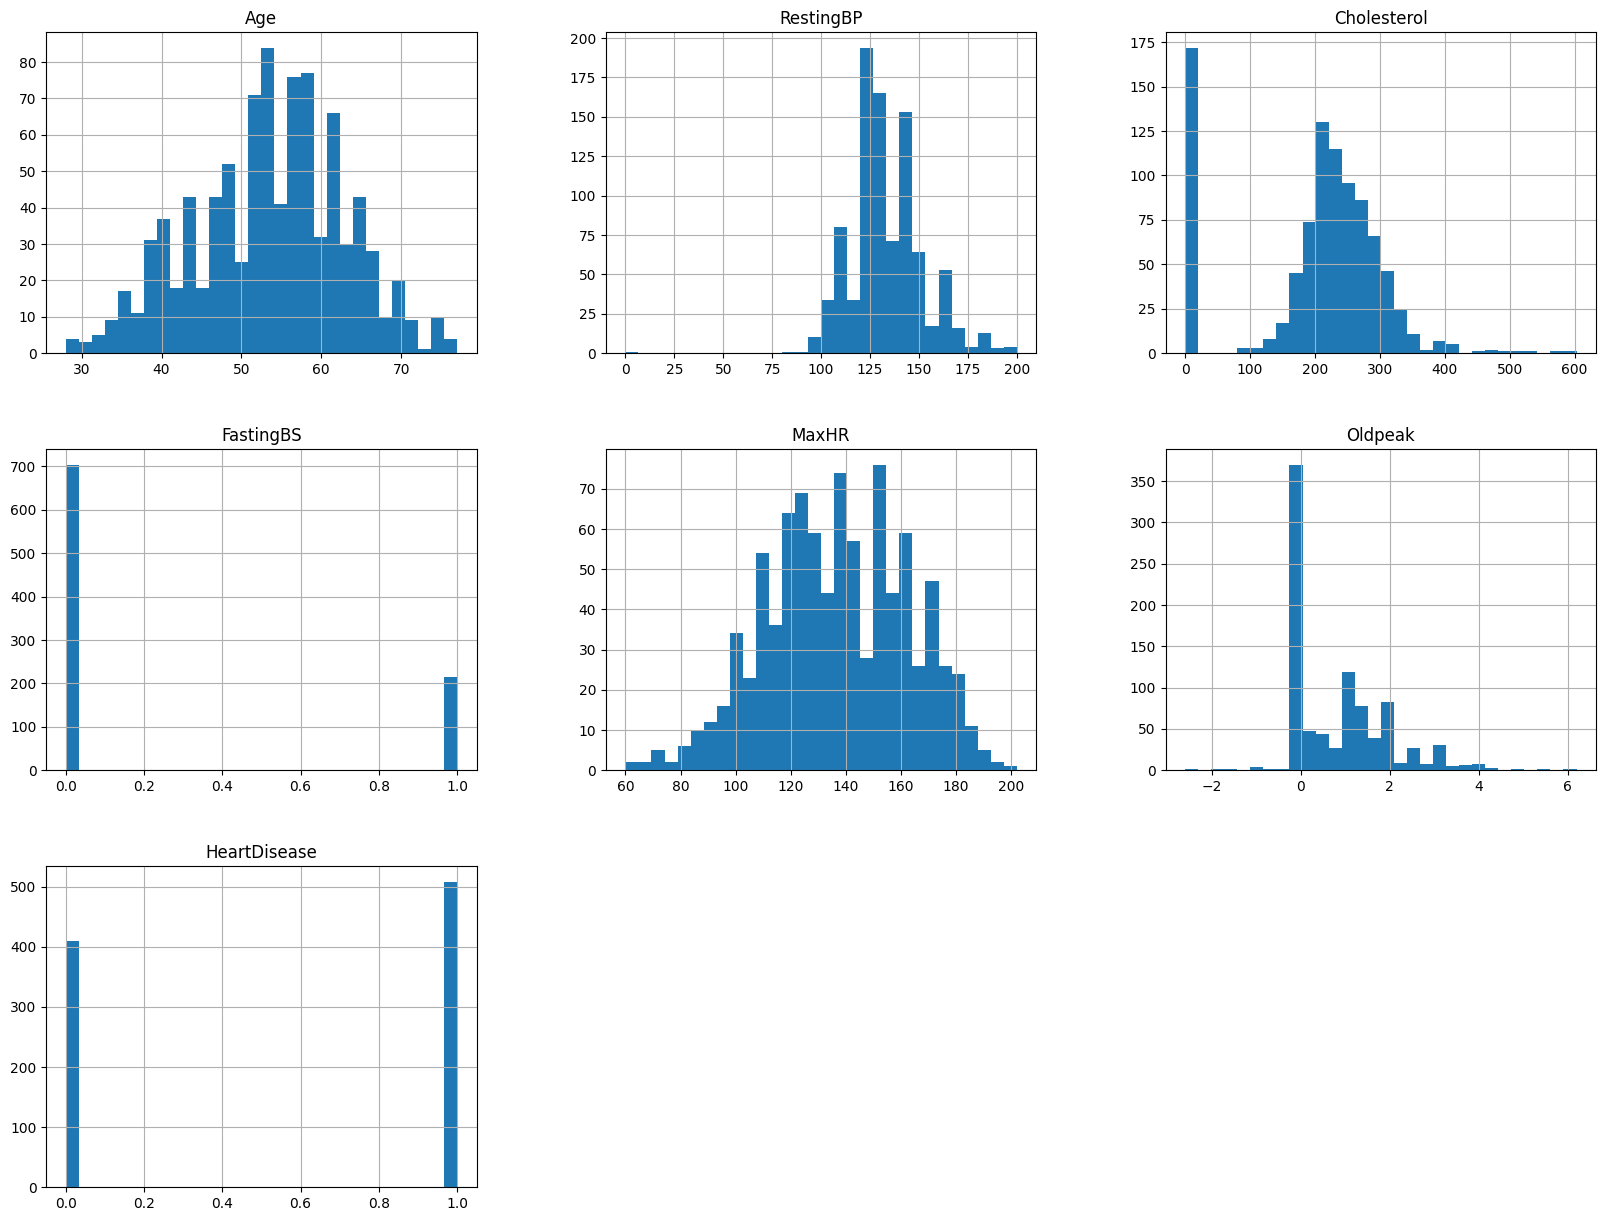

In [7]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(20, 15))
plt.show()


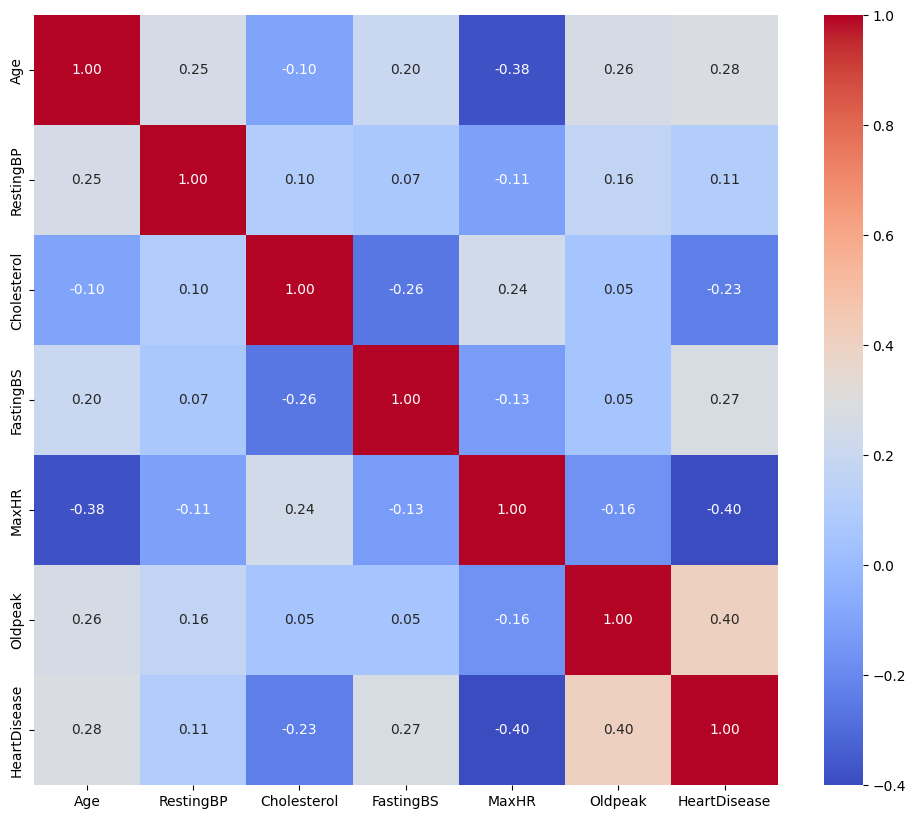

In [8]:
numeric_df = df.select_dtypes(include='number')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [9]:
df1= df.groupby('Sex').agg({'Age' : 'mean', "ChestPainType":'count','RestingBP':'mean','Cholesterol':'mean',
                            'FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean',
                            'ST_Slope':'count','HeartDisease':'sum'})
df1


,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,52.492228,193,132.212435,241.196891,26,193,146.139896,193,0.668912,193,50
M,53.782069,725,132.445517,187.513103,188,725,134.325517,725,0.945517,725,458


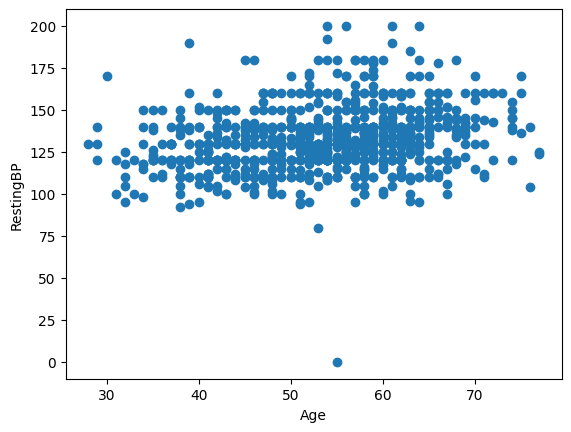

In [10]:
plt.scatter(df['Age'], df['RestingBP'])
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.show()


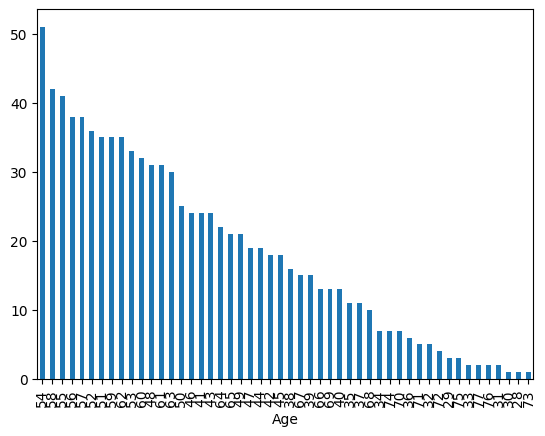

In [11]:
df['Age'].value_counts().plot(kind='bar')
plt.show()


In [12]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode categorical variables
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Normalize numerical features
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the preprocessed dataset
df_encoded.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [14]:
def OneHotEncoding(dfcolumn):
  global df
  dfcolumn.nunique()
  len(df.columns)
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  df=pd.concat([df,dummies],axis='columns')
  df.drop(columns=dfcolumn.name,axis=1,inplace=True) 
  if(finallencol==len(df.columns)):
    print('OneHotEncoding is sucessfull') 
    print('')
  else:
    print('Unsucessfull')
  return df.head(5)


In [15]:
OneHotEncoding(df['ChestPainType'])
OneHotEncoding(df['Sex'])
OneHotEncoding(df['RestingECG'])
OneHotEncoding(df['ExerciseAngina'])
OneHotEncoding(df['ST_Slope'])

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,False,False,True,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,True,False,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,False,False,True,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,False,True,False,True,True,False,False,False,True


In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                        Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age                1.000000   0.254399    -0.095282   0.198039 -0.382045   
RestingBP          0.254399   1.000000     0.100893   0.070193 -0.112135   
Cholesterol       -0.095282   0.100893     1.000000  -0.260974  0.235792   
FastingBS          0.198039   0.070193    -0.260974   1.000000 -0.131438   
MaxHR             -0.382045  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak            0.258612   0.164803     0.050148   0.052698 -0.160691   
HeartDisease       0.282039   0.107589    -0.232741   0.267291 -0.400421   
ChestPainType_ATA -0.218165  -0.046153     0.150954  -0.140514  0.253735   
ChestPainType_NAP -0.011335  -0.041348    -0.006634  -0.039249  0.134580   
ChestPainType_TA   0.032042   0.049855     0.017365   0.026885  0.100025   
Sex_M              0.055750   0.005133    -0.200092   0.120076 -0.189186   
RestingECG_Normal -0.230566  -0.116851    -0.038470  -0.093028  0.023801   
RestingECG_S

In [17]:
import datetime

# Assuming there's a column named 'year' for the manufacturing year
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['HeartDisease']

# Display the updated data
print(df.head())


    Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0  2024        140          289          0    172      0.0             0   
1  2023        160          180          0    156      1.0             1   
2  2024        130          283          0     98      0.0             0   
3  2023        138          214          0    108      1.5             1   
4  2024        150          195          0    122      0.0             0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  Sex_M  \
0               True              False             False   True   
1              False               True             False  False   
2               True              False             False   True   
3              False              False             False  False   
4              False               True             False   True   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False         

In [18]:
print(df.isnull().sum())
print(df.columns)

# Assuming the target column is named 'target'
# Split the dataset into features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for certain models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
Sex_M                0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64
Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'Sex_M', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = linear_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression - MSE: {mse}, R2: {r2}')


Linear Regression - MSE: 1.6217334964754987e-30, R2: 1.0


In [20]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = tree_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Decision Tree Regressor - MSE: {mse}, R2: {r2}')


Decision Tree Regressor - MSE: 0.0, R2: 1.0


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
forest_regressor = RandomForestRegressor(random_state=42)
forest_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = forest_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest Regressor - MSE: {mse}, R2: {r2}')


Random Forest Regressor - MSE: 0.0, R2: 1.0


In [22]:
from sklearn.neighbors import KNeighborsRegressor

# Train the model
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'K-Nearest Neighbors Regressor - MSE: {mse}, R2: {r2}')


K-Nearest Neighbors Regressor - MSE: 0.027391304347826086, R2: 0.8874426508071368


In [23]:
from sklearn.svm import SVR

# Train the model
svr_regressor = SVR()
svr_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Support Vector Regressor - MSE: {mse}, R2: {r2}')


Support Vector Regressor - MSE: 0.009829319781944549, R2: 0.9596089998133858


In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
cv = KFold(n_splits=10, random_state=100, shuffle=True)
model = KNeighborsClassifier(n_neighbors=36)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of KNN: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
model = SVC(kernel='rbf')
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of SVC: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
model=RandomForestClassifier(n_estimators =40,random_state=100)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of RandomForest: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy of KNN: 0.703 (0.044)
Accuracy of SVC: 0.548 (0.045)
Accuracy of RandomForest: 1.000 (0.000)


In [25]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(i,np.mean(pred_i != y_test))

1 0.3858695652173913
2 0.41304347826086957
3 0.3695652173913043
4 0.3532608695652174
5 0.32065217391304346
6 0.34782608695652173
7 0.30978260869565216
8 0.34782608695652173
9 0.32065217391304346
10 0.3532608695652174
11 0.34782608695652173
12 0.34782608695652173
13 0.3423913043478261
14 0.33695652173913043
15 0.32065217391304346
16 0.34782608695652173
17 0.3423913043478261
18 0.3641304347826087
19 0.33695652173913043
20 0.3532608695652174
21 0.3423913043478261
22 0.358695652173913
23 0.33152173913043476
24 0.3423913043478261
25 0.33152173913043476
26 0.3423913043478261
27 0.34782608695652173
28 0.3423913043478261
29 0.3423913043478261
30 0.3532608695652174
31 0.33152173913043476
32 0.3423913043478261
33 0.33152173913043476
34 0.34782608695652173
35 0.3423913043478261
36 0.3423913043478261
37 0.33695652173913043
38 0.33695652173913043
39 0.33152173913043476


Text(0, 0.5, 'Error Rate')

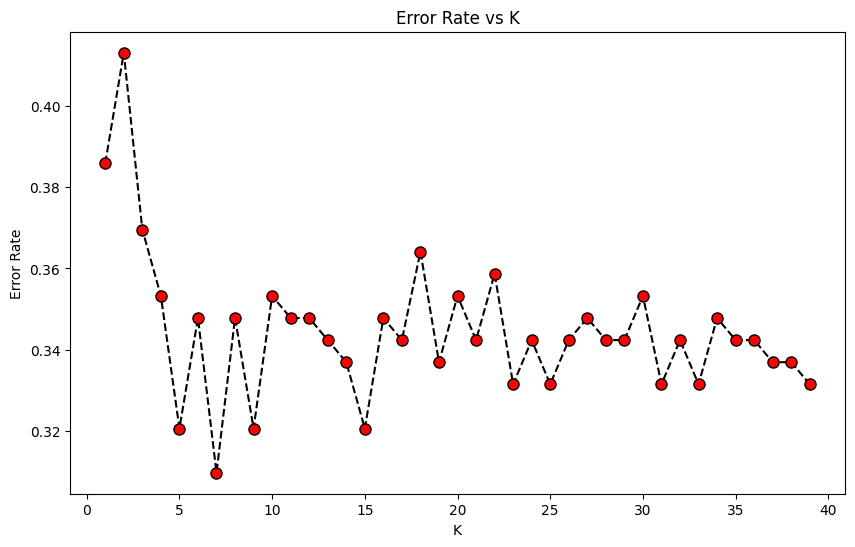

In [26]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,2024,140,289,0,172,0.0,0,True,False,False,True,True,False,False,False,True
1,2023,160,180,0,156,1.0,1,False,True,False,False,True,False,False,True,False
2,2024,130,283,0,98,0.0,0,True,False,False,True,False,True,False,False,True
3,2023,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,2024,150,195,0,122,0.0,0,False,True,False,True,True,False,False,False,True


In [28]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


              precision    recall  f1-score   support

           0       0.57      0.70      0.63        77
           1       0.74      0.63      0.68       107

    accuracy                           0.66       184
   macro avg       0.66      0.66      0.66       184
weighted avg       0.67      0.66      0.66       184

[[54 23]
 [40 67]]


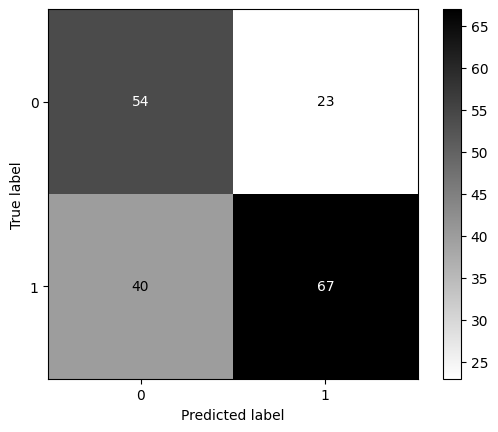

In [29]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
classifier = KNeighborsClassifier(n_neighbors=36)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=classifier.classes_)
disp.plot(cmap="binary")
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

           0       0.45      0.19      0.27        77
           1       0.59      0.83      0.69       107

    accuracy                           0.57       184
   macro avg       0.52      0.51      0.48       184
weighted avg       0.53      0.57      0.52       184

[[15 62]
 [18 89]]


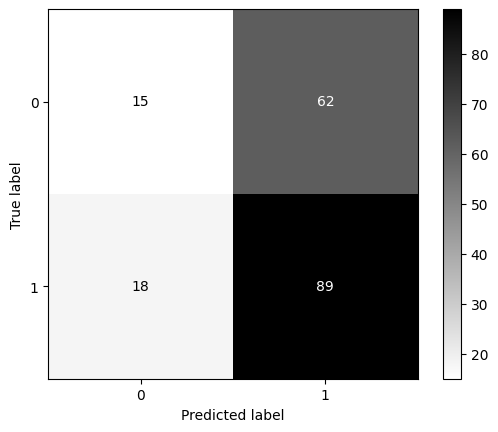

In [30]:
classifier = SVC(kernel='rbf', random_state=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=classifier.classes_)
disp.plot(cmap="binary")
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       138

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



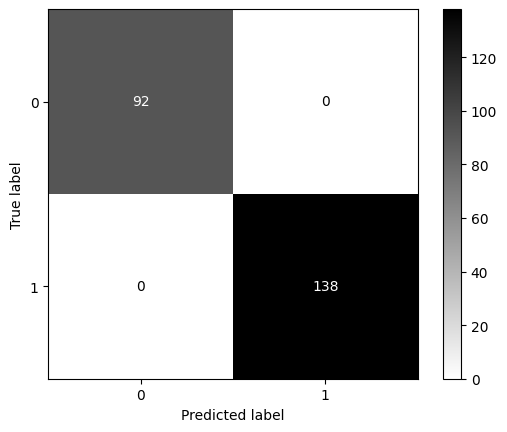

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf=RandomForestClassifier(n_estimators=124,min_samples_split= 2,
                           min_samples_leaf= 1,max_features='sqrt',max_depth=None, bootstrap=False)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=classifier.classes_)
disp.plot(cmap="binary")
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       138

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



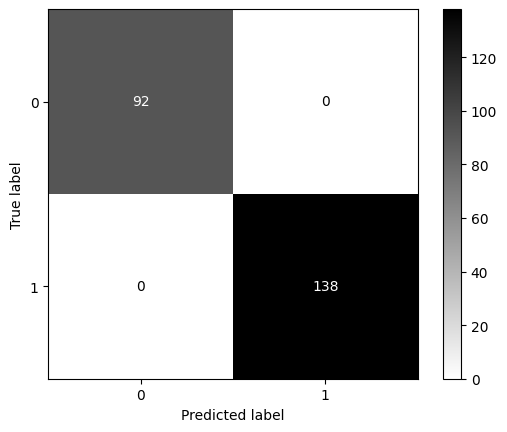

Accuracy: 100.00%


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
clff = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=1, random_state=23)
clff.fit(X_train, y_train)
y_pred=clff.predict(X_test)
print(classification_report(y_test, y_pred))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=classifier.classes_)
disp.plot(cmap="binary")
plt.grid(False)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [33]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

# Train and evaluate the models
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy * 100

accuracies

{'KNN': 93.91304347826087,
 'Random Forest': 100.0,
 'Support Vector Classifier': 100.0,
 'Gradient Boosting Classifier': 100.0}

In [34]:
# Filter the dataset to show only HeartDisease patients
heart_disease_patients = df[df['HeartDisease'] == 0]

# Display the first few rows of the filtered dataset
print(heart_disease_patients.head())

    Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0  2024        140          289          0    172      0.0             0   
2  2024        130          283          0     98      0.0             0   
4  2024        150          195          0    122      0.0             0   
5  2024        120          339          0    170      0.0             0   
6  2024        130          237          0    170      0.0             0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  Sex_M  \
0               True              False             False   True   
2               True              False             False   True   
4              False               True             False   True   
5              False               True             False   True   
6               True              False             False  False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False         